In [120]:
import os
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing
import sklearn.neural_network
import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
os.chdir("/home/aicsuser/cytodata-hackathon-base")
df_mitocells = pd.read_csv('/home/aicsuser/serotiny_data/mitocells.csv')

In [186]:
feat_slice = pd.read_csv('/home/aicsuser/features/slice_embed.csv')
feat_meanx = pd.read_csv('/home/aicsuser/features/meanx_embed.csv')
feat_meany = pd.read_csv('/home/aicsuser/features/meany_embed.csv')
feat_meanz = pd.read_csv('/home/aicsuser/features/meanz_embed.csv')

In [187]:
feat_slice = feat_slice[[x for x in feat_slice.columns if 'mu' in x]]
feat_meanx = feat_meanx[[x for x in feat_meanx.columns if 'mu' in x]]
feat_meany = feat_meany[[x for x in feat_meany.columns if 'mu' in x]]
feat_meanz = feat_meanz[[x for x in feat_meanz.columns if 'mu' in x]]
feat_slice = feat_slice.iloc[:df_mitocells.shape[0],:]
feat_meanx = feat_meanx.iloc[:df_mitocells.shape[0],:]
feat_meany = feat_meany.iloc[:df_mitocells.shape[0],:]
feat_meanz = feat_meanz.iloc[:df_mitocells.shape[0],:]

In [188]:
#scaler = sklearn.preprocessing.StandardScaler()
X = np.concatenate([feat_slice, feat_meanx, feat_meany, feat_meanz], axis=1)
#X = feat_meanx.copy()
#scaler.fit(X)
#X = scaler.transform(X)
X_train = X.copy()
X_test = X.copy()
X_train = X_train[df_mitocells['split']=='train']
X_test = X_test[df_mitocells['split']=='test']
y_train = df_mitocells.copy()
y_test = df_mitocells.copy()
y_train = y_train.loc[df_mitocells['split']=='train','cell_stage']
y_test = y_test.loc[df_mitocells['split']=='test','cell_stage']

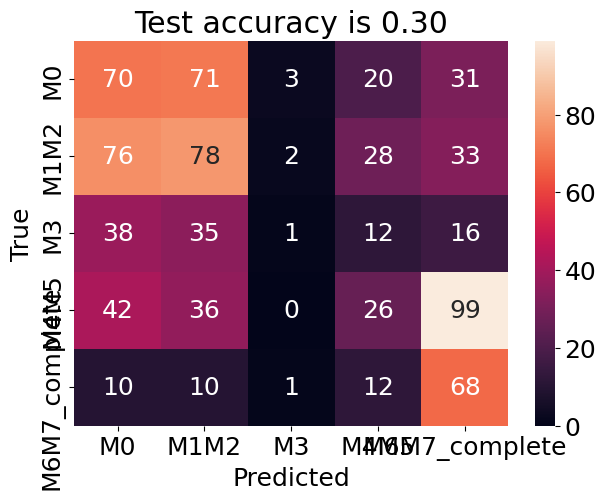

In [189]:
#Adapted from Chapter 4
# Import RF classifier and confusion matrix functionality
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# Adapt font size of plots
plt.rcParams.update({'font.size': 18})

# Initialize classifer
clf = RandomForestClassifier(max_depth=10, class_weight='balanced')
#clf = sklearn.neural_network.MLPClassifier((128,32))

# Fit the model
clf.fit(X_train, y_train)
# Apply the model (to the test dataset)
y_testpred = clf.predict(X_test)

# Show performance as a confusion matrix                       
cm_test = confusion_matrix(y_test, y_testpred, labels = df_mitocells['cell_stage'].unique())                        

# plot it
labels = df_mitocells['cell_stage'].unique()
cm_test_df = pd.DataFrame(cm_test)
score_test = accuracy_score(y_test,y_testpred) #compute accuracy score
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 5), dpi=100)

sns.heatmap(cm_test_df, annot=True, fmt='d',ax=axes)
axes.set_title(f'Test accuracy is {score_test:.2f}')
axes.set_ylabel('True')
axes.set_xlabel('Predicted')
axes.set_xticklabels([''] + labels)
axes.set_yticklabels([''] + labels)
plt.show()

In [190]:
mapper = umap.UMAP()
mapper.fit(X_test)

UMAP(tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

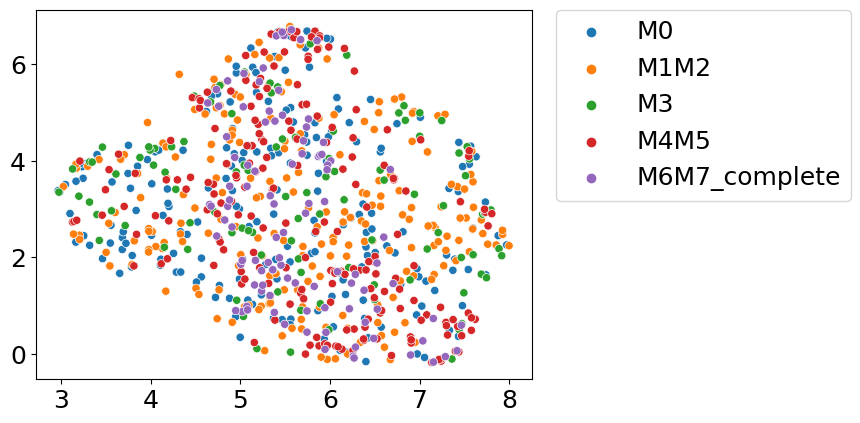

In [191]:
sns.scatterplot(x=mapper.embedding_[:,0], y=mapper.embedding_[:,1], hue=y_test)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)